## 5.11　学習率の変更


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display

In [3]:
%matplotlib inline

In [4]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
x = x_org[:, feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5, :])

print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


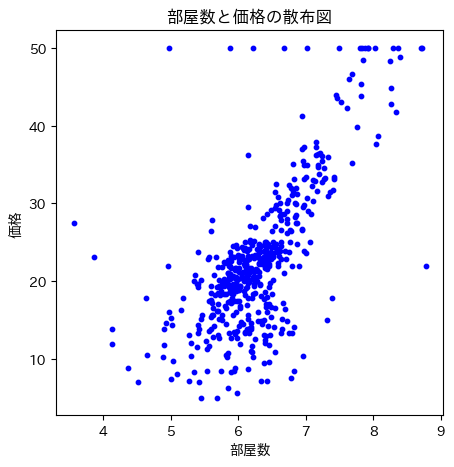

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()

In [7]:
n_input = x.shape[1]
n_output = 1
print(f'入力次元数: {n_input} 出力次元数: {n_output}')

入力次元数: 1 出力次元数: 1


In [8]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [9]:
net = Net(n_input, n_output)

In [10]:
# outputs = net(inputs)

In [11]:
for parameter in net.named_parameters():
  print(f'変数名: {parameter[0]}')
  print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [12]:
for parameter in net.parameters():
  print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [13]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [14]:
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [15]:
criterion = nn.MSELoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [16]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [17]:
labels1 = labels.view((-1, 1))
print(labels1.shape)

torch.Size([506, 1])


In [18]:
outputs = net(inputs)

In [19]:
loss = criterion(outputs, labels1)
print(f'{loss.item():.5f}')

308.44986


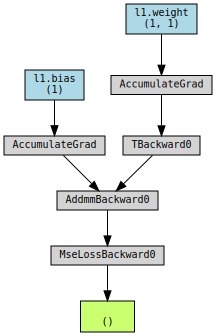

In [20]:
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [21]:
outputs = net(inputs)
loss = criterion(outputs, labels1)
loss.backward()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [22]:
optimizer.step()
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [23]:
optimizer.zero_grad()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


In [24]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 2))

In [25]:
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels1) / 2.0
  loss.backward()
  optimizer.step()
  if (epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90057
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56715
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94655
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69226
Epoch 3100 loss: 25.59978
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42136
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

In [26]:
print(f'損失初期値: {history[0, 1]:.5f}')
print(f'損失最終値: {history[-1, 1]:.5f}')

損失初期値: 154.22493
損失最終値: 21.80033


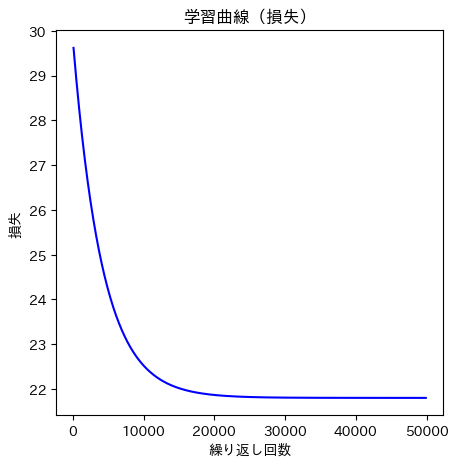

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(history[1:, 0], history[1:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()

In [28]:
xse = np.array((x.min(), x.max())).reshape(-1, 1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2188644]
 [45.212074 ]]


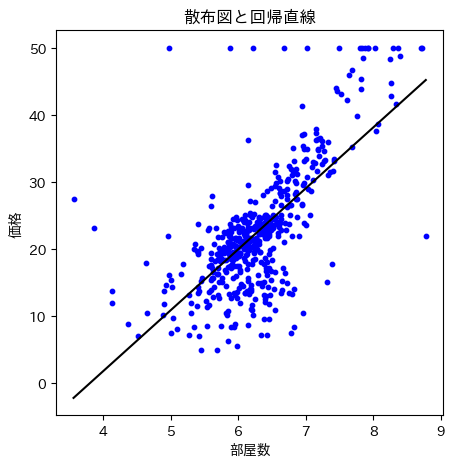

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

In [30]:
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [31]:
n_input = x2.shape[1]
print(n_input)
net = Net(n_input, n_output)

2


In [32]:
for parameter in net.named_parameters():
  print(f'変数名: {parameter[0]}')
  print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1., 1.]])
変数名: l1.bias
変数値: tensor([1.])


In [33]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [34]:
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [35]:
inputs = torch.tensor(x2).float()

In [36]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 2))

In [37]:
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels1) / 2.0
  loss.backward()
  optimizer.step()

  if (epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 3753837073642659568666615480320.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan
Epoch 4000 loss: nan
Epoch 4100 loss: nan
Epoch 4200 loss: nan
Epoch 4300 loss: nan
Epoch 4400 loss: nan
Epoch 4500 loss: nan
Epoch 

In [38]:
num_epochs = 2000
lr = 0.001
net = Net(n_input, n_output)
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()

In [39]:
history = np.zeros((0, 2))

for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels1) / 2.0
  loss.backward()
  optimizer.step()

  if(epoch % 100 ==0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023


In [40]:
print(f'損失初期値: {history[0, 1]:.5f}')
print(f'損失最終値: {history[-1, 1]:.5f}')

損失初期値: 112.06398
損失最終値: 15.28023


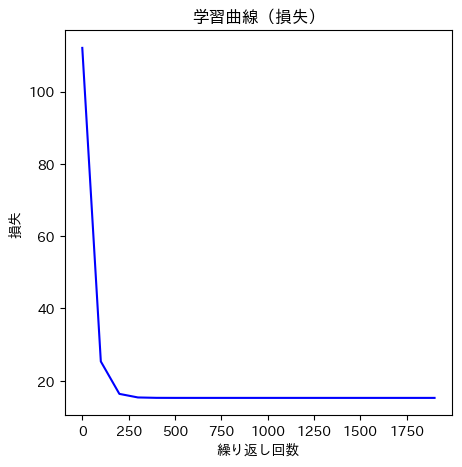

In [41]:
plt.figure(figsize=(5, 5))
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()